# Time Series Analysis

Trend: An increase or decrease in data over a period of time is called a trend.

Seasonal: Oftentimes, seasonality is of a fixed and known frequency. For example, seasonal factors like the time of the year or the day of the week, a seasonal pattern occurs.

Cyclic: When a data exhibit fluctuates, a cycle occurs. But unlike seasonal, it is not of a fixed frequency.

In [2]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
!pip install chart_studio
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

     |████████████████████████████████| 71kB 3.3MB/s 


In [3]:
import datetime

In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2018, 1, 1)
start_date_str = str(start.date())
end_date_str = str(end.date())

In [5]:
stocks = ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'XOM', 'GE',
          'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE',
          'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT', 'GOOGL', 'AMZN', 'AABA']

In [6]:
import pandas as pd

for (i, ticker) in enumerate(stocks):
    file_name = 'data/' + ticker + '_' + start_date_str + '_to_' + end_date_str + '.csv'
    print(file_name)
    data = pd.read_csv(file_name, parse_dates=['Date'], index_col=['Date'])
    print(data.shape)
    data['Name'] = ticker
    data.to_csv(file_name)
    
    if i == 0:
        all_stocks = data
    else:
        all_stocks = all_stocks.append(data)
        
print(all_stocks.shape)
all_stocks_file_name = 'data/all_stocks_' + start_date_str + '_to_' + end_date_str + '.csv'
all_stocks.to_csv(all_stocks_file_name)

data/MMM_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/AXP_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/AAPL_2006-01-01_to_2018-01-01.csv
(3019, 6)
data/BA_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/CAT_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/CVX_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/CSCO_2006-01-01_to_2018-01-01.csv
(3019, 6)
data/KO_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/DIS_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/XOM_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/GE_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/GS_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/HD_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/IBM_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/INTC_2006-01-01_to_2018-01-01.csv
(3019, 6)
data/JNJ_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/JPM_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/MCD_2006-01-01_to_2018-01-01.csv
(3020, 6)
data/MRK_2006-01-01_to_2018-01-01.csv
(3019, 6)
data/MSFT_2006-01-01_to_2018-01-01.csv
(3019, 6)
data/NKE_2006-01-01_to_2018-01-01.csv
(30

In [7]:
print(all_stocks.shape)

(93612, 6)


In [8]:
# Here we are moving the date field into the index and that let us filtering of data easier

all_stocks = pd.read_csv(all_stocks_file_name, parse_dates=['Date'], index_col=['Date'])

In [9]:
all_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    93587 non-null  float64
 1   High    93602 non-null  float64
 2   Low     93592 non-null  float64
 3   Close   93612 non-null  float64
 4   Volume  93612 non-null  int64  
 5   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


In [10]:
all_stocks.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [11]:
all_stocks_2006_17 = all_stocks.loc['2006':'2017']

In [12]:
all_stocks_2006_17

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA


In [13]:
select_org = (all_stocks_2006_17['Name'] == 'IBM')
selected_stock_2006_17 = all_stocks_2006_17[select_org]

In [14]:
selected_stock_2006_17

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
...,...,...,...,...,...,...
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM


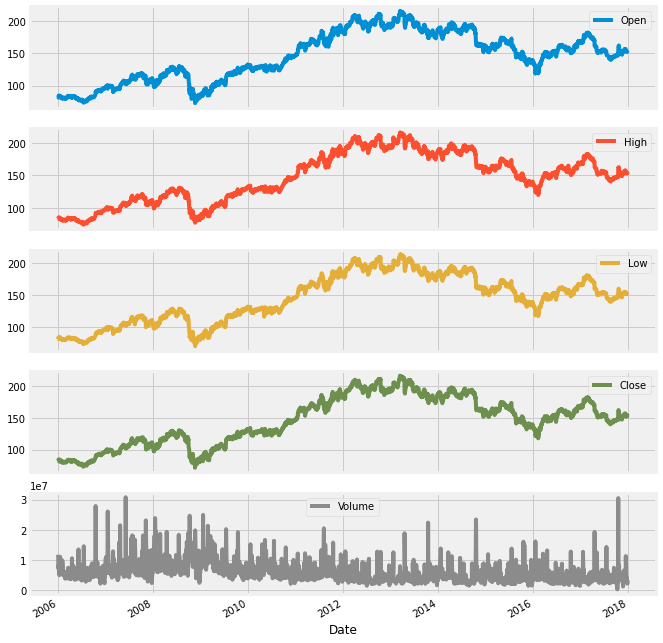

In [15]:
selected_stock_2006_17.plot(subplots = True, figsize = (10,12))
plt.show()

The predictability of an event or a quantity depends on several factors including:

- How well we understand the factors that contribute to it;
- How much data is available;
- Whether the forecasts can affect the thing we are trying to forecast.

In [16]:
import pandas as pd

time_data = pd.read_csv("multiTimeline.csv", skiprows=1)

In [17]:
time_data.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [18]:
time_data.columns = ['month', 'diet', 'gym', 'finance']
time_data.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [19]:
# Setting the Month to index

time_data.month = pd.to_datetime(time_data.month)
time_data.set_index('month', inplace=True)

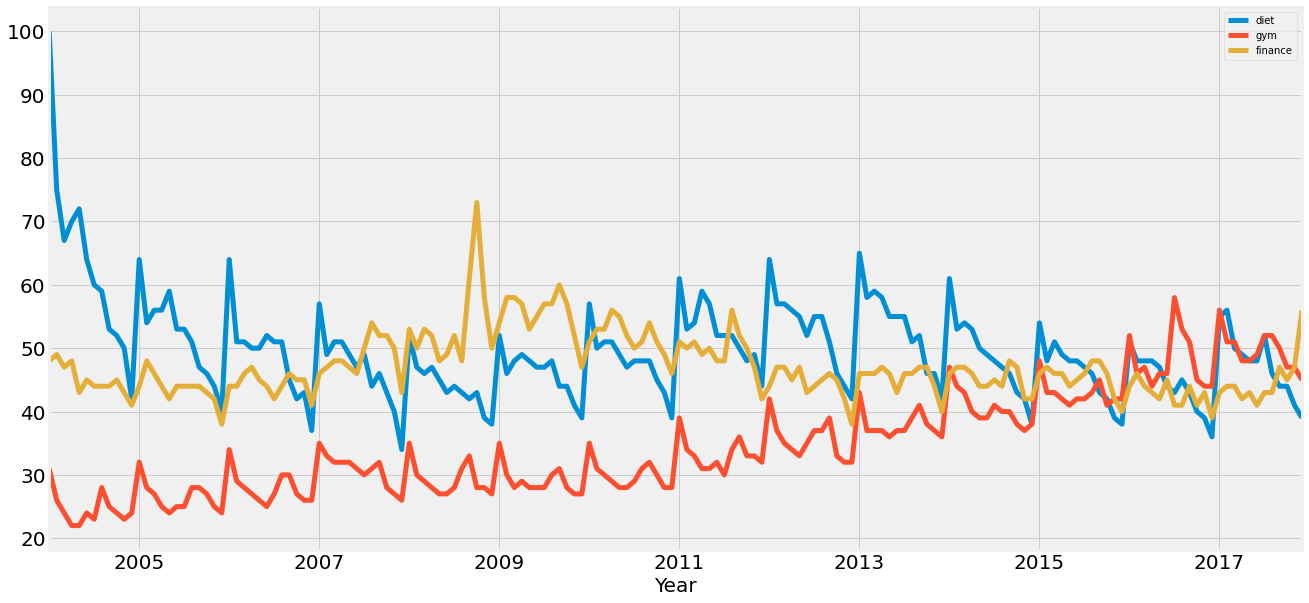

In [20]:
time_data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

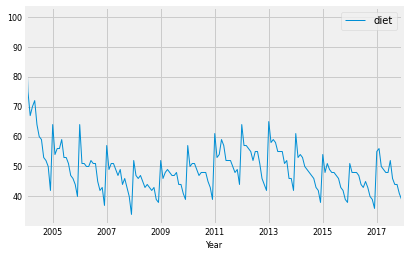

In [24]:
time_data[['diet']].plot(figsize=(6,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=8);

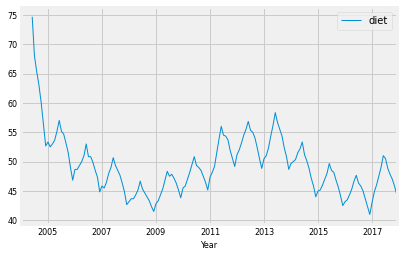

In [27]:
diet = time_data[['diet']]
diet.rolling(6).mean().plot(figsize=(6,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=8);

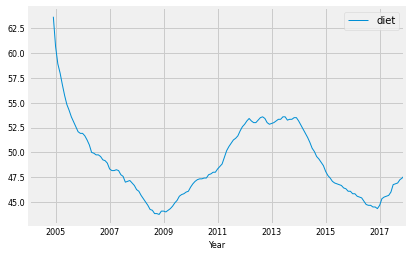

In [28]:
diet = time_data[['diet']]
diet.rolling(12).mean().plot(figsize=(6,4), linewidth=1, fontsize=8)
plt.xlabel('Year', fontsize=8);

In [29]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)
 
# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob

In [30]:
# define a dataset with a linear trend
data = [i+1 for i in range(20)]
print(data)
# difference the dataset
diff = difference(data)
print(list(diff))
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
print(inverted)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Text(0.5, 0, 'Period')

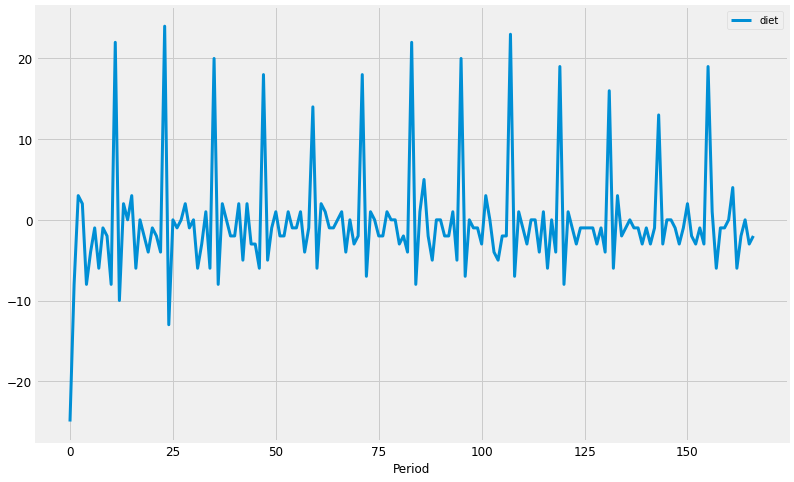

In [31]:
diet_list = difference(list(time_data['diet']), 1)  # Note the interval i.e. 1
seq = list(range(0,len(diet_list)))

df_manual = pd.DataFrame({'period' : seq,
                          'diet' : diet_list})

df_manual.set_index('period', inplace=True)

df_manual.plot(figsize=(12,8), linewidth=3, fontsize = 12)
plt.xlabel('Period', fontsize = 12)

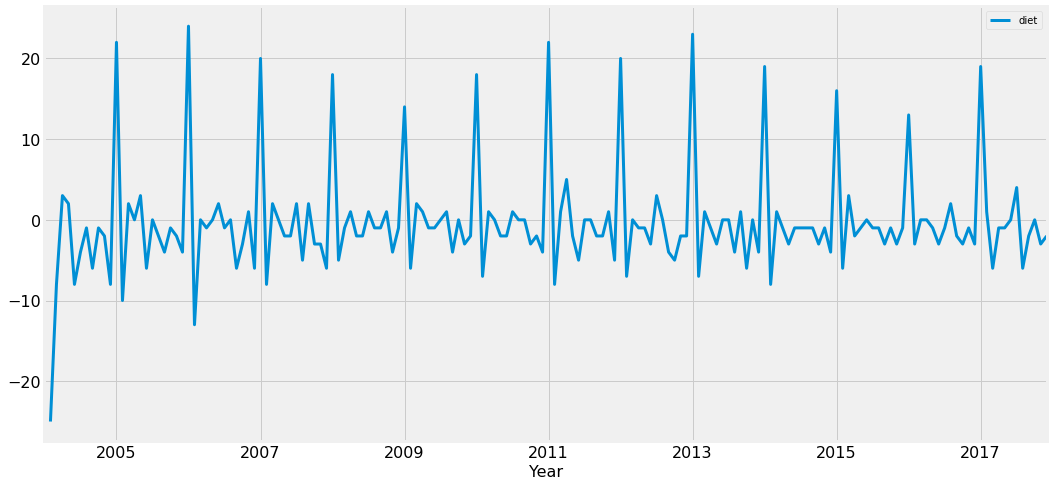

In [33]:
diet.diff().plot(figsize=(16,8), linewidth=3, fontsize=16)
plt.xlabel('Year', fontsize=16);

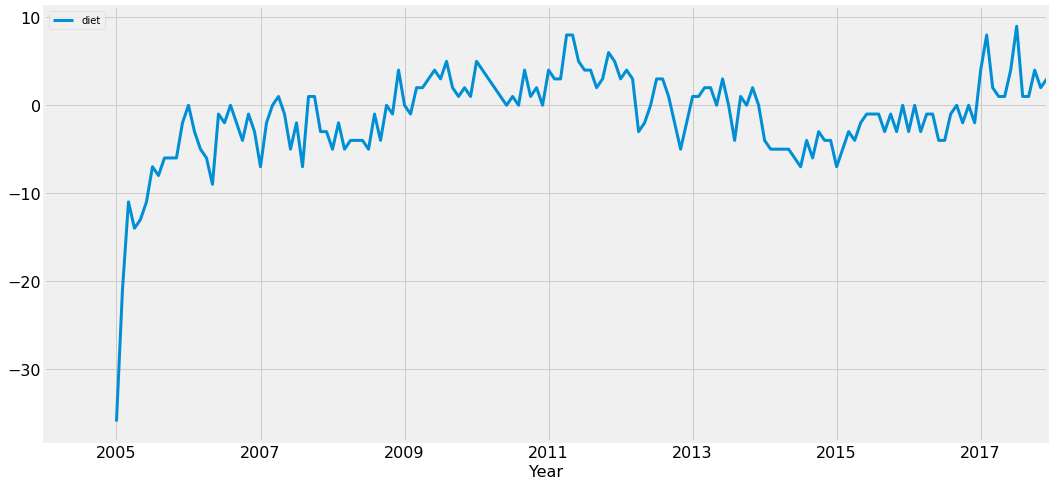

In [34]:
diet.diff(12).plot(figsize=(16,8), linewidth=3, fontsize=16)
plt.xlabel('Year', fontsize=16);

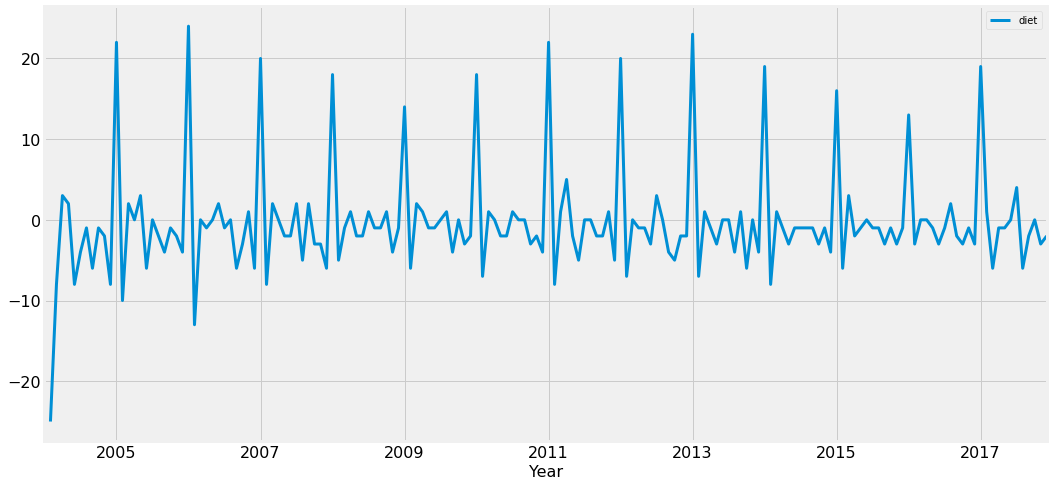

In [35]:
with_out_trend = pd.DataFrame(diet.diff())
with_out_trend.plot(figsize=(16,8), linewidth=3, fontsize=16)
plt.xlabel('Year', fontsize=16);

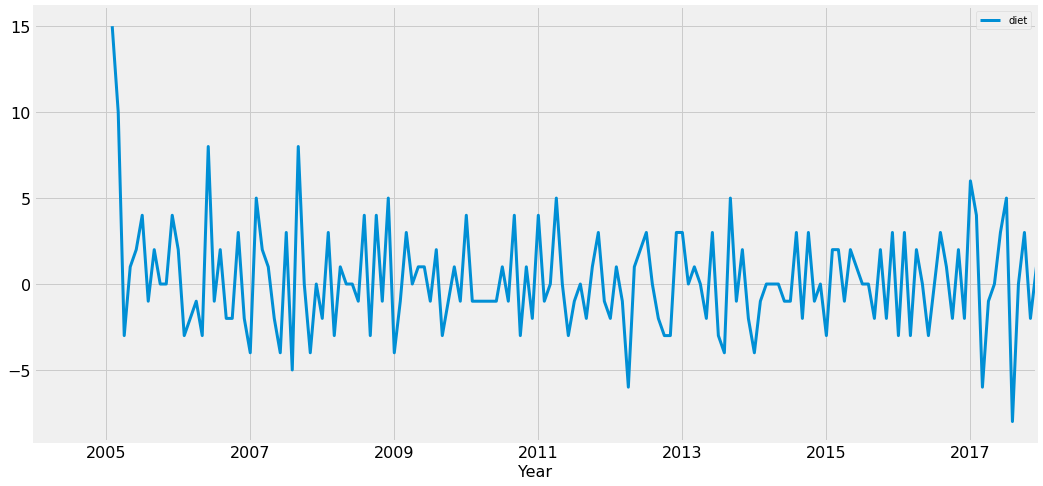

In [36]:
# Now we are removing seasonality component, post removal of trend.
with_out_trend.diff(12).plot(figsize=(16,8), linewidth=3, fontsize=16)
plt.xlabel('Year', fontsize=16);